In [ ]:
import time
start_time = time.time()

**INSTALLING CBFV**

In [ ]:
!pip install CBFV

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 3.6 MB/s eta 0:00:00


**IMPORTING REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from CBFV import composition
from CBFV.composition import generate_features
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import cross_val_score

**READING DATA FROM EXCEL**

In [ ]:
df = pd.read_excel('/content/Data.xlsx')

Dropping the values that don't have Mo.

In [ ]:
for i in range(len(df)):
    if 'Mo' not in df['formula'][i]:
        df = df.drop(i)

**FEATURISATION**

In [ ]:
from CBFV import composition
X, y, formulae, skipped = composition.generate_features(df,
                                                        elem_prop='oliynyk',
                                                        drop_duplicates=False,
                                                        extend_features=True,
                                                        sum_feat=True)

Processing Input Data: 100%|██████████| 51/51 [00:00<00:00, 9413.79it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 51/51 [00:00<00:00, 5755.21it/s]

	Creating Pandas Objects...


In [ ]:
y.head()

0    10.580772
1     7.953477
2     4.805103
3    10.968149
4     8.710251
Name: target, dtype: float64

In [ ]:
ya = X.loc[:, 'Temperature']

In [ ]:
ya.head()

0    2010.525852
1    2037.488875
2    2049.113503
3    2085.299870
4    2096.932923
Name: Temperature, dtype: float64

In [ ]:
!mv f3_revised.csv /usr/local/lib/python3.10/dist-packages/CBFV/element_properties/

In [ ]:
X1, y1, formulae, skipped = composition.generate_features(df,elem_prop='f3_revised',drop_duplicates=False,extend_features=True)

Processing Input Data: 100%|██████████| 51/51 [00:00<00:00, 12077.09it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 51/51 [00:00<00:00, 7038.35it/s]

	Creating Pandas Objects...


In [ ]:
y1.head()

0    10.580772
1     7.953477
2     4.805103
3    10.968149
4     8.710251
Name: target, dtype: float64

In [ ]:
y1a = X1.loc[:, 'Temperature']

In [ ]:
y1a.head()

0    2010.525852
1    2037.488875
2    2049.113503
3    2085.299870
4    2096.932923
Name: Temperature, dtype: float64

In [ ]:
X.drop(columns=['Temperature'],inplace=True)

In [ ]:
X

In [ ]:
X1.drop(columns=['Temperature'],inplace=True)

In [ ]:
X.head()

,sum_Atomic_Number,sum_Atomic_Weight,sum_Period,sum_group,sum_families,sum_Metal,sum_Nonmetal,sum_Metalliod,sum_Mendeleev_Number,sum_l_quantum_number,...,mode_polarizability(A^3),mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy
0,50.25,118.439095,5.25,6.25,4.0,1.0,0.0,0.0,51.00,2.0,...,9.6,2583.15,4173.15,8.57,0.13,24.00,595.0,53.7,643.0,6.74
1,57.50,138.385845,5.50,5.50,4.0,1.0,0.0,0.0,49.00,2.0,...,9.7,2500.15,4873.15,8.57,0.13,24.06,575.0,23.0,619.0,6.44
2,61.50,149.482356,5.65,4.70,4.0,1.0,0.0,0.0,46.75,2.0,...,16.2,2500.15,4873.15,13.30,0.14,24.06,575.0,23.0,619.0,6.44
3,50.50,119.030845,5.25,6.50,4.0,1.0,0.0,0.0,51.75,2.0,...,9.6,2583.15,4173.15,8.57,0.13,24.00,595.0,47.9,643.0,6.74
4,55.20,131.992676,5.40,6.40,4.0,1.0,0.0,0.0,51.60,2.0,...,9.6,2583.15,4173.15,8.57,0.13,24.00,595.0,47.9,643.0,6.74


In [ ]:
X1.head()

,avg_Atomic_Radius,avg_Pauling_Electronegativity,avg_number_of_valence_electrons,avg_Cohesive_energy_ev_atom,avg_Bulk_modulus_RT_Gpa,avg_Elastic_modulus_RT_Gpa,avg_Shear_modulus_RT_Gpa,avg_Melting_point_(K),avg_rate_shear_mod_Mpa_perK,avg_Solid_Solubility_atpct,...,mode_Bulk_modulus_RT_Gpa,mode_Elastic_modulus_RT_Gpa,mode_Shear_modulus_RT_Gpa,mode_Melting_point_(K),mode_rate_shear_mod_Mpa_perK,mode_Solid_Solubility_atpct,mode_lattice_constant_A,mode_BEC_percm3,mode_Av.Valence_bond_strength_ev,mode_EngelZ_e/a
0,1.8975,2.080,6.25,7.5075,232.5,323.00,98.00,2974.40,-14.089422,85.000,...,170.0,105.0,20.0,2583.15,-30.016346,40.0,2.70,2.750000e-21,3.779,5.0
1,1.9600,1.740,5.50,7.2150,220.0,243.75,66.50,2896.15,-8.834628,86.375,...,110.0,78.0,20.0,2500.15,-20.837452,45.5,2.76,1.810000e-21,3.775,4.0
2,2.0170,1.529,4.70,7.0550,158.0,142.65,37.90,2760.65,-5.851249,100.000,...,110.0,78.0,30.0,2500.15,-5.443103,100.0,3.20,1.810000e-21,3.775,4.0
3,1.8850,1.965,6.50,7.2900,247.5,336.00,102.25,2916.90,-14.977939,71.375,...,170.0,105.0,20.0,2583.15,-30.016346,40.0,2.70,2.750000e-21,3.779,5.0
4,1.8940,2.044,6.40,7.6120,260.0,351.00,114.00,3070.15,-15.439028,77.100,...,170.0,105.0,20.0,2583.15,-30.016346,40.0,2.70,2.750000e-21,3.779,5.0


In [ ]:
X1.columns

Index(['avg_Atomic_Radius', 'avg_Pauling_Electronegativity',
       'avg_number_of_valence_electrons', 'avg_Cohesive_energy_ev_atom',
       'avg_Bulk_modulus_RT_Gpa', 'avg_Elastic_modulus_RT_Gpa',
       'avg_Shear_modulus_RT_Gpa', 'avg_Melting_point_(K)',
       'avg_rate_shear_mod_Mpa_perK', 'avg_Solid_Solubility_atpct',
       'avg_lattice_constant_A', 'avg_BEC_percm3',
       'avg_Av.Valence_bond_strength_ev', 'avg_EngelZ_e/a',
       'dev_Atomic_Radius', 'dev_Pauling_Electronegativity',
       'dev_number_of_valence_electrons', 'dev_Cohesive_energy_ev_atom',
       'dev_Bulk_modulus_RT_Gpa', 'dev_Elastic_modulus_RT_Gpa',
       'dev_Shear_modulus_RT_Gpa', 'dev_Melting_point_(K)',
       'dev_rate_shear_mod_Mpa_perK', 'dev_Solid_Solubility_atpct',
       'dev_lattice_constant_A', 'dev_BEC_percm3',
       'dev_Av.Valence_bond_strength_ev', 'dev_EngelZ_e/a',
       'range_Atomic_Radius', 'range_Pauling_Electronegativity',
       'range_number_of_valence_electrons', 'range_Cohesive_e

In [ ]:
X_unscaled_avg = X[['sum_Atomic_Number','sum_Atomic_Weight','sum_Period','sum_group','sum_families','sum_Metal','sum_Nonmetal','sum_Metalliod','sum_Mendeleev_Number','sum_l_quantum_number','mode_Melting_point_(K)','mode_Boiling_Point_(K)','mode_Density_(g/mL)','mode_specific_heat_(J/g_K)_','mode_heat_of_fusion_(kJ/mol)_','mode_heat_of_vaporization_(kJ/mol)_','mode_thermal_conductivity_(W/(m_K))_','mode_heat_atomization(kJ/mol)','mode_Cohesive_energy']]
X1_unscaled_avg  = X1[['avg_Atomic_Radius', 'avg_Pauling_Electronegativity',
       'avg_number_of_valence_electrons', 'avg_Cohesive_energy_ev_atom',
       'avg_Bulk_modulus_RT_Gpa', 'avg_Elastic_modulus_RT_Gpa',
       'avg_Shear_modulus_RT_Gpa', 'avg_Melting_point_(K)',
       'avg_rate_shear_mod_Mpa_perK', 'avg_Solid_Solubility_atpct',
       'avg_lattice_constant_A', 'avg_BEC_percm3',
       'avg_Av.Valence_bond_strength_ev', 'avg_EngelZ_e/a',
       'dev_Atomic_Radius', 'dev_Pauling_Electronegativity',
       'dev_number_of_valence_electrons', 'dev_Cohesive_energy_ev_atom',
       'dev_Bulk_modulus_RT_Gpa', 'dev_Elastic_modulus_RT_Gpa',
       'dev_Shear_modulus_RT_Gpa', 'dev_Melting_point_(K)',
       'dev_rate_shear_mod_Mpa_perK', 'dev_Solid_Solubility_atpct',
       'dev_lattice_constant_A', 'dev_BEC_percm3',
       'dev_Av.Valence_bond_strength_ev', 'dev_EngelZ_e/a',
       'range_Atomic_Radius', 'range_Pauling_Electronegativity',
       'range_number_of_valence_electrons', 'range_Cohesive_energy_ev_atom',
       'range_Bulk_modulus_RT_Gpa', 'range_Elastic_modulus_RT_Gpa',
       'range_Shear_modulus_RT_Gpa', 'range_Melting_point_(K)',
       'range_rate_shear_mod_Mpa_perK', 'range_Solid_Solubility_atpct',
       'range_lattice_constant_A', 'range_BEC_percm3',
       'range_Av.Valence_bond_strength_ev', 'range_EngelZ_e/a',
       'max_Atomic_Radius', 'max_Pauling_Electronegativity',
       'max_number_of_valence_electrons', 'max_Cohesive_energy_ev_atom',
       'max_Bulk_modulus_RT_Gpa', 'max_Elastic_modulus_RT_Gpa',
       'max_Shear_modulus_RT_Gpa', 'max_Melting_point_(K)',
       'max_rate_shear_mod_Mpa_perK', 'max_Solid_Solubility_atpct',
       'max_lattice_constant_A', 'max_BEC_percm3',
       'max_Av.Valence_bond_strength_ev', 'max_EngelZ_e/a',
       'min_Atomic_Radius', 'min_Pauling_Electronegativity',
       'min_number_of_valence_electrons', 'min_Cohesive_energy_ev_atom',
       'min_Bulk_modulus_RT_Gpa', 'min_Elastic_modulus_RT_Gpa',
       'min_Shear_modulus_RT_Gpa', 'min_Melting_point_(K)',
       'min_rate_shear_mod_Mpa_perK', 'min_Solid_Solubility_atpct',
       'min_lattice_constant_A', 'min_BEC_percm3',
       'min_Av.Valence_bond_strength_ev', 'min_EngelZ_e/a',
       'mode_Atomic_Radius', 'mode_Pauling_Electronegativity',
       'mode_number_of_valence_electrons', 'mode_Cohesive_energy_ev_atom',
       'mode_Bulk_modulus_RT_Gpa', 'mode_Elastic_modulus_RT_Gpa',
       'mode_Shear_modulus_RT_Gpa', 'mode_Melting_point_(K)',
       'mode_rate_shear_mod_Mpa_perK', 'mode_Solid_Solubility_atpct',
       'mode_lattice_constant_A', 'mode_BEC_percm3',
       'mode_Av.Valence_bond_strength_ev', 'mode_EngelZ_e/a']]

**STANDARD SCALING**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unscaled_avg)
X1_scaled = scaler.fit_transform(X1_unscaled_avg)

In [ ]:
y_combined = pd.concat([y, ya], axis=1)
y1_combined = pd.concat([y1, y1a], axis=1)

In [ ]:
y_combined = scaler.fit_transform(y_combined)
y1_combined = scaler.fit_transform(y1_combined)

**SPLITTING DATASET FOR TRAINING AND TESTING**

In [ ]:
X_train,X_test,y_train_combined,y_test_combined,formulae_train, formulae_test=train_test_split(X_scaled,y_combined,formulae,test_size=0.2,random_state=21)
X1_train,X1_test,y1_train_combined,y1_test_combined,formulae1_train, formulae1_test=train_test_split(X1_scaled,y_combined,formulae,test_size=0.2,random_state=21)

In [ ]:
y_train_combined = pd.DataFrame(y_train_combined)
y_test_combined = pd.DataFrame(y_test_combined)
y1_train_combined = pd.DataFrame(y1_train_combined)
y1_test_combined = pd.DataFrame(y1_test_combined)

In [ ]:
y_train = y_train_combined.iloc[:, 0]
ya_train = y_train_combined.iloc[:, 1]
y_test = y_test_combined.iloc[:, 0]
ya_test = y_test_combined.iloc[:, 1]

y1_train = y1_train_combined.iloc[:, 0]
y1a_train = y1_train_combined.iloc[:, 1]
y1_test = y1_test_combined.iloc[:, 0]
y1a_test = y1_test_combined.iloc[:, 1]

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
rng_seed = 20

gbr_model = GradientBoostingRegressor(random_state=rng_seed, criterion='squared_error')
gbr_modela = GradientBoostingRegressor(random_state=rng_seed, criterion='squared_error')

gbr_model1 = GradientBoostingRegressor(random_state=rng_seed, criterion='squared_error')
gbr_model1a = GradientBoostingRegressor(random_state=rng_seed, criterion='squared_error')

gbr_model.fit(X_train,y_train)
gbr_modela.fit(X_train,ya_train)

gbr_model1.fit(X1_train,y1_train)
gbr_model1a.fit(X1_train,y1a_train)

y_train_predict=gbr_model.predict(X_train)
y_test_predict=gbr_model.predict(X_test)

ya_train_predict=gbr_modela.predict(X_train)
ya_test_predict=gbr_modela.predict(X_test)


y1_train_predict=gbr_model1.predict(X1_train)
y1_test_predict=gbr_model1.predict(X1_test)

y1a_train_predict=gbr_model1a.predict(X1_train)
y1a_test_predict=gbr_model1a.predict(X1_test)

In [ ]:
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_test_predict)

rmse_train = mean_squared_error(y_train,y_train_predict,squared=True)
rmse_test = mean_squared_error(y_test,y_test_predict,squared=True)

r2a_train = r2_score(ya_train,ya_train_predict)
r2a_test = r2_score(ya_test,ya_test_predict)

rmsea_train = mean_squared_error(ya_train,ya_train_predict,squared=True)
rmsea_test = mean_squared_error(ya_test,ya_test_predict,squared=True)



r21_train = r2_score(y1_train,y1_train_predict)
r21_test = r2_score(y1_test,y1_test_predict)

rmse1_train = mean_squared_error(y1_train,y1_train_predict,squared=True)
rmse1_test = mean_squared_error(y1_test,y1_test_predict,squared=True)

r21a_train = r2_score(y1a_train,y1a_train_predict)
r21a_test = r2_score(y1a_test,y1a_test_predict)

rmse1a_train = mean_squared_error(y1a_train,y1a_train_predict,squared=True)
rmse1a_test = mean_squared_error(y1a_test,y1a_test_predict,squared=True)

In [ ]:
print("Model with oliynyk: ")
print("Hardness: ")
print("R Squared Value of Training Data = ", r2_train)
print("R Squared Value of Testing Data = ", r2_test)

print("RMSE Value of Training Data = ", rmse_train)
print("RMSE Value of Testing Data = ", rmse_test)

print("Temperature: ")
print("R Squared Value of Training Data = ", r2a_train)
print("R Squared Value of Testing Data = ", r2a_test)

print("RMSE Value of Training Data = ", rmsea_train)
print("RMSE Value of Testing Data = ", rmsea_test)

print("")

print("Model with f3_revised:")
print("Hardness:")
print("R Squared Value of Training Data = ", r21_train)
print("R Squared Value of Testing Data = ", r21_test)

print("RMSE Value of Training Data = ", rmse1_train)
print("RMSE Value of Testing Data = ", rmse1_test)

print("Temperature:")
print("R Squared Value of Training Data = ", r21a_train)
print("R Squared Value of Testing Data = ", r21a_test)

print("RMSE Value of Training Data = ", rmse1a_train)
print("RMSE Value of Testing Data = ", rmse1a_test)

Model with oliynyk: 
Hardness: 
R Squared Value of Training Data =  0.9988923576897035
R Squared Value of Testing Data =  -0.35613987483596166
RMSE Value of Training Data =  0.0011225291386724816
RMSE Value of Testing Data =  1.0709348519192845
Temperature: 
R Squared Value of Training Data =  0.9985895162871837
R Squared Value of Testing Data =  0.8992926914377454
RMSE Value of Training Data =  0.001351846877633017
RMSE Value of Testing Data =  0.11462912124411404

Model with f3_revised:
Hardness:
R Squared Value of Training Data =  0.9998499215471893
R Squared Value of Testing Data =  0.6713753032466311
RMSE Value of Training Data =  0.00015209552289652235
RMSE Value of Testing Data =  0.25951278882435264
Temperature:
R Squared Value of Training Data =  0.9985562382374467
R Squared Value of Testing Data =  0.9543102854567134
RMSE Value of Training Data =  0.0013837414874196866
RMSE Value of Testing Data =  0.05200587626422126


In [ ]:
X_train,X_test,y_train_combined,y_test_combined,formulae_train, formulae_test=train_test_split(X_scaled,y_combined,formulae,test_size=0.2,random_state=21)
X1_train,X1_test,y1_train_combined,y1_test_combined,formulae1_train, formulae1_test=train_test_split(X1_scaled,y_combined,formulae,test_size=0.2,random_state=21)

In [ ]:
y_train_combined = pd.DataFrame(y_train_combined)
y_test_combined = pd.DataFrame(y_test_combined)
y1_train_combined = pd.DataFrame(y1_train_combined)
y1_test_combined = pd.DataFrame(y1_test_combined)

In [ ]:
y_train = y_train_combined.iloc[:, 0]
ya_train = y_train_combined.iloc[:, 1]
y_test = y_test_combined.iloc[:, 0]
ya_test = y_test_combined.iloc[:, 1]

y1_train = y1_train_combined.iloc[:, 0]
y1a_train = y1_train_combined.iloc[:, 1]
y1_test = y1_test_combined.iloc[:, 0]
y1a_test = y1_test_combined.iloc[:, 1]

**GRADIENT BOOSTING REGRESSOR MODEL**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
rng_seed = 20

gbr_model = GradientBoostingRegressor(random_state=rng_seed, criterion='squared_error')
gbr_modela = GradientBoostingRegressor(random_state=rng_seed, criterion='squared_error')

gbr_model1 = GradientBoostingRegressor(random_state=rng_seed, criterion='squared_error')
gbr_model1a = GradientBoostingRegressor(random_state=rng_seed, criterion='squared_error')

gbr_model.fit(X_train,y_train)
gbr_modela.fit(X_train,ya_train)

gbr_model1.fit(X1_train,y1_train)
gbr_model1a.fit(X1_train,y1a_train)

y_train_predict=gbr_model.predict(X_train)
y_test_predict=gbr_model.predict(X_test)

ya_train_predict=gbr_modela.predict(X_train)
ya_test_predict=gbr_modela.predict(X_test)


y1_train_predict=gbr_model1.predict(X1_train)
y1_test_predict=gbr_model1.predict(X1_test)

y1a_train_predict=gbr_model1a.predict(X1_train)
y1a_test_predict=gbr_model1a.predict(X1_test)

**ACCURACY**

In [ ]:
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_test_predict)

rmse_train = mean_squared_error(y_train,y_train_predict,squared=True)
rmse_test = mean_squared_error(y_test,y_test_predict,squared=True)

r2a_train = r2_score(ya_train,ya_train_predict)
r2a_test = r2_score(ya_test,ya_test_predict)

rmsea_train = mean_squared_error(ya_train,ya_train_predict,squared=True)
rmsea_test = mean_squared_error(ya_test,ya_test_predict,squared=True)



r21_train = r2_score(y1_train,y1_train_predict)
r21_test = r2_score(y1_test,y1_test_predict)

rmse1_train = mean_squared_error(y1_train,y1_train_predict,squared=True)
rmse1_test = mean_squared_error(y1_test,y1_test_predict,squared=True)

r21a_train = r2_score(y1a_train,y1a_train_predict)
r21a_test = r2_score(y1a_test,y1a_test_predict)

rmse1a_train = mean_squared_error(y1a_train,y1a_train_predict,squared=True)
rmse1a_test = mean_squared_error(y1a_test,y1a_test_predict,squared=True)

In [ ]:
print("Model with oliynyk: ")
print("Hardness: ")
print("R Squared Value of Training Data = ", r2_train)
print("R Squared Value of Testing Data = ", r2_test)

print("RMSE Value of Training Data = ", rmse_train)
print("RMSE Value of Testing Data = ", rmse_test)

print("Temperature: ")
print("R Squared Value of Training Data = ", r2a_train)
print("R Squared Value of Testing Data = ", r2a_test)

print("RMSE Value of Training Data = ", rmsea_train)
print("RMSE Value of Testing Data = ", rmsea_test)

print("")

print("Model with f3_revised:")
print("Hardness:")
print("R Squared Value of Training Data = ", r21_train)
print("R Squared Value of Testing Data = ", r21_test)

print("RMSE Value of Training Data = ", rmse1_train)
print("RMSE Value of Testing Data = ", rmse1_test)

print("Temperature:")
print("R Squared Value of Training Data = ", r21a_train)
print("R Squared Value of Testing Data = ", r21a_test)

print("RMSE Value of Training Data = ", rmse1a_train)
print("RMSE Value of Testing Data = ", rmse1a_test)

Model with oliynyk: 
Hardness: 
R Squared Value of Training Data =  0.9988923576897035
R Squared Value of Testing Data =  -0.35613987483596166
RMSE Value of Training Data =  0.0011225291386724816
RMSE Value of Testing Data =  1.0709348519192845
Temperature: 
R Squared Value of Training Data =  0.9985895162871837
R Squared Value of Testing Data =  0.8992926914377454
RMSE Value of Training Data =  0.001351846877633017
RMSE Value of Testing Data =  0.11462912124411404

Model with f3_revised:
Hardness:
R Squared Value of Training Data =  0.9998499215471893
R Squared Value of Testing Data =  0.6713753032466311
RMSE Value of Training Data =  0.00015209552289652235
RMSE Value of Testing Data =  0.25951278882435264
Temperature:
R Squared Value of Training Data =  0.9985562382374467
R Squared Value of Testing Data =  0.9543102854567134
RMSE Value of Training Data =  0.0013837414874196866
RMSE Value of Testing Data =  0.05200587626422126


Since the f3_revised models are giving better accuracy, we will use it from now on

**SCATTER PLOTS**

Text(0.5, 1.0, 'Training Data: True vs Predicted Hardness')

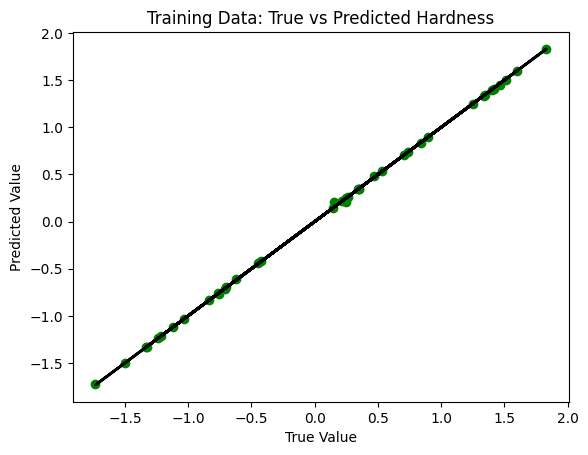

In [ ]:
plt.scatter(y1_train, y1_train_predict, color='green')
plt.plot(y1_train, y1_train, color='black', linewidth=2)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("Training Data: True vs Predicted Hardness")

Text(0.5, 1.0, 'Training Data: True vs Predicted Temperature')

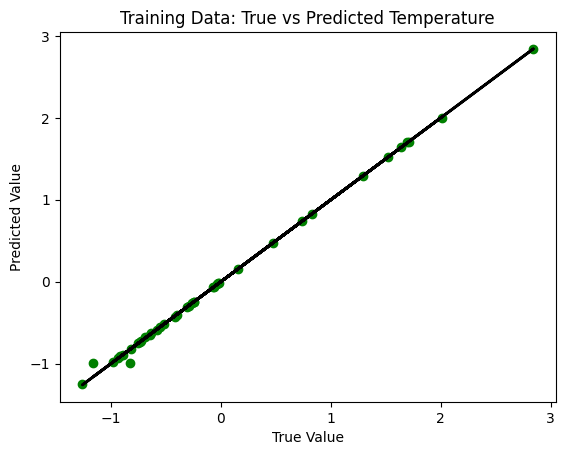

In [ ]:
plt.scatter(y1a_train, y1a_train_predict, color='green')
plt.plot(y1a_train, y1a_train, color='black', linewidth=2)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("Training Data: True vs Predicted Temperature")

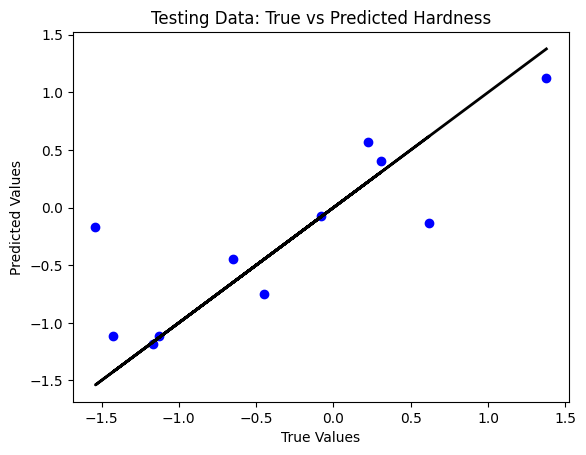

In [ ]:
plt.scatter(y1_test, y1_test_predict, color='blue')
plt.plot(y1_test, y1_test, color='black', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Testing Data: True vs Predicted Hardness")
plt.show()

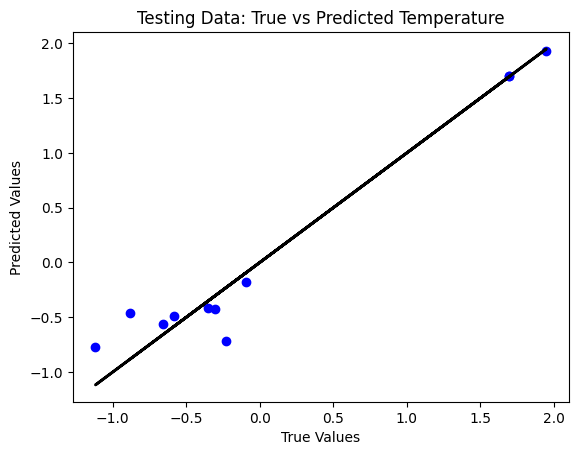

In [ ]:
plt.scatter(y1a_test, y1a_test_predict, color='blue')
plt.plot(y1a_test, y1a_test, color='black', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Testing Data: True vs Predicted Temperature")
plt.show()

**Generating Virtual Samples**

In [ ]:
elements = ['Mo', 'Hf', 'Nb', 'W', 'Ti']

In [ ]:
def generate_random_composition(elements, n_samples):
    compositions = []
    for _ in range(n_samples):
        comp = np.random.dirichlet(np.ones(len(elements)), size=1)[0]
        comp_pct = (comp * 100).round(2)
        formula = ' '.join([f"{element}{value:.2f}" for element, value in zip(elements, comp_pct)])
        compositions.append(formula)
    return pd.DataFrame(compositions, columns=['formula'])

**Generating 1000 SAMPLES FROM TEST FILE**

In [ ]:
virtual_samples = generate_random_composition(elements, 1000)

In [ ]:
virtual_samples.head()

,formula
0,Mo50.89 Hf36.86 Nb4.28 W4.63 Ti3.34
1,Mo25.49 Hf39.49 Nb4.90 W11.86 Ti18.26
2,Mo32.72 Hf11.76 Nb37.11 W17.06 Ti1.36
3,Mo1.49 Hf16.82 Nb9.32 W61.16 Ti11.21
4,Mo11.52 Hf36.40 Nb6.82 W17.17 Ti28.09


In [ ]:
virtual_samples['target'] = 0

FEATURING THE TEST SAMPLES

In [ ]:
virtual_samples_features, skipped1, formula, additional_values = composition.generate_features(virtual_samples,elem_prop='f3_revised',drop_duplicates=False,extend_features=True)

Processing Input Data: 100%|██████████| 1000/1000 [00:00<00:00, 13163.27it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1000/1000 [00:00<00:00, 6355.45it/s]


	Creating Pandas Objects...


In [ ]:
virtual_samples_features.head()

,avg_Atomic_Radius,avg_Pauling_Electronegativity,avg_number_of_valence_electrons,avg_Cohesive_energy_ev_atom,avg_Bulk_modulus_RT_Gpa,avg_Elastic_modulus_RT_Gpa,avg_Shear_modulus_RT_Gpa,avg_Melting_point_(K),avg_rate_shear_mod_Mpa_perK,avg_Solid_Solubility_atpct,...,mode_Bulk_modulus_RT_Gpa,mode_Elastic_modulus_RT_Gpa,mode_Shear_modulus_RT_Gpa,mode_Melting_point_(K),mode_rate_shear_mod_Mpa_perK,mode_Solid_Solubility_atpct,mode_lattice_constant_A,mode_BEC_percm3,mode_Av.Valence_bond_strength_ev,mode_EngelZ_e/a
0,1.966485,1.807588,5.153200,6.742538,182.896000,223.576600,31.786300,2744.770900,-4.962877,100.0,...,230.0,329.0,20.0,2890.15,-2.977833,100.0,3.15,3.840000e-21,4.431,6.0
1,1.952996,1.703454,4.796000,6.593654,167.248000,189.735500,45.936000,2648.139600,-7.337468,100.0,...,110.0,78.0,30.0,2500.15,-5.443103,100.0,3.20,1.810000e-21,3.775,4.0
2,1.954065,1.876764,5.366563,7.381637,205.640436,227.458554,52.233577,2911.260589,-6.973646,100.0,...,170.0,105.0,38.0,2741.15,-6.080125,100.0,3.30,2.750000e-21,3.972,5.0
3,1.940386,2.015974,5.346200,7.877275,239.700000,292.178900,112.285600,3188.384300,-13.374757,100.0,...,310.0,411.0,161.0,3683.15,-17.283385,100.0,3.16,3.790000e-21,5.143,6.0
4,1.936801,1.668950,4.642000,6.536593,162.256000,176.606900,55.818900,2605.365000,-8.908144,100.0,...,110.0,78.0,30.0,2500.15,-5.443103,100.0,3.20,1.810000e-21,3.775,4.0


In [ ]:
virtual_samples_features.columns

Index(['avg_Atomic_Radius', 'avg_Pauling_Electronegativity',
       'avg_number_of_valence_electrons', 'avg_Cohesive_energy_ev_atom',
       'avg_Bulk_modulus_RT_Gpa', 'avg_Elastic_modulus_RT_Gpa',
       'avg_Shear_modulus_RT_Gpa', 'avg_Melting_point_(K)',
       'avg_rate_shear_mod_Mpa_perK', 'avg_Solid_Solubility_atpct',
       'avg_lattice_constant_A', 'avg_BEC_percm3',
       'avg_Av.Valence_bond_strength_ev', 'avg_EngelZ_e/a',
       'dev_Atomic_Radius', 'dev_Pauling_Electronegativity',
       'dev_number_of_valence_electrons', 'dev_Cohesive_energy_ev_atom',
       'dev_Bulk_modulus_RT_Gpa', 'dev_Elastic_modulus_RT_Gpa',
       'dev_Shear_modulus_RT_Gpa', 'dev_Melting_point_(K)',
       'dev_rate_shear_mod_Mpa_perK', 'dev_Solid_Solubility_atpct',
       'dev_lattice_constant_A', 'dev_BEC_percm3',
       'dev_Av.Valence_bond_strength_ev', 'dev_EngelZ_e/a',
       'range_Atomic_Radius', 'range_Pauling_Electronegativity',
       'range_number_of_valence_electrons', 'range_Cohesive_e

In [ ]:
virtual_samples_scaled = scaler.fit_transform(virtual_samples_features)

In [ ]:
predicted_properties = gbr_model1.predict(virtual_samples_scaled)

In [ ]:
def compute_property(predictions):
    return np.mean(predictions)

In [ ]:
property_value = compute_property(predicted_properties)

**BOOTSTRAP ESTIMATOR**

In [ ]:
def bootstrap_estimator(model1, model2, X_train, y_train, ya_train_all, X_test, n_iter=1000):

    '''
    Function to estimate the mean and standard deviation

    paramenters:
    model = best model hyperparameters
    X_train = training features
    y_tain = training target
    X_test = test features
    n_iter = no of bootstrap sample
    seed = 20 is fixed to have repeatability in boot straping

    return:
    returns mean and standard deviation
    '''

    '''Changed to accomodate two models at same time'''


    bootstrap_preds1 = np.zeros([len(X_test), n_iter])
    bootstrap_preds2 = np.zeros([len(X_test), n_iter])

    index = np.arange(X_train.shape[0])
    np.random.seed(32)
    for i in range(n_iter):
        index_sampled = np.random.choice(index, size=X_train.shape[0], replace=True)

        X_train_sample = pd.DataFrame(X_train).iloc[index_sampled.tolist(),:]
        y_train_sample = y_train.iloc[index_sampled] if isinstance(y_train, pd.Series) else y_train[index_sampled]
        ya_train_sample = ya_train_all.iloc[index_sampled] if isinstance(ya_train_all, pd.Series) else ya_train_all[index_sampled]

        model1.fit(X_train_sample, y_train_sample)
        model2.fit(X_train_sample, ya_train_sample)

        pred_i1 = model1.predict(X_test)
        pred_i2 = model2.predict(X_test)

        bootstrap_preds1[:,i] = pred_i1
        bootstrap_preds2[:,i] = pred_i2
    return(bootstrap_preds1.mean(axis=1),bootstrap_preds1.std(axis=1), bootstrap_preds2.mean(axis=1),bootstrap_preds2.std(axis=1))


**DEFINING FUCNTION FOR EI CALCULATION**

In [ ]:
def Expected_Improvement(X_test, X_train_all, y_train_all, ya_train_all, model1, model2, xi=0.01):

    '''
     Calcualting the Expected Improvement
     More information : http://krasserm.github.io/2018/03/21/bayesian-optimization/
     parameters: mean, std, y_train, xi
     return :
     Expected improvement value

    '''

    '''Changed to accommodate two models at same time'''

    mu_x1, sigma_x1, mu_x2,sigma_x2 = bootstrap_estimator(model1, model2, X_train_all, y_train_all, ya_train_all, X_test, n_iter=1000)
    mu_max1 = np.max(y_train_all)
    mu_max2 = np.max(ya_train_all)

    diff1 = (mu_x1-mu_max1-xi)
    z1 = diff1/sigma_x1
    ei1 = diff1*norm.cdf(z1)+sigma_x1*norm.pdf(z1)
    ei1[sigma_x1 == 0.0] = 0.
    diff2 = (mu_x2-mu_max2-xi)
    z2 = diff2/sigma_x2
    ei2 = diff2*norm.cdf(z2)+sigma_x2*norm.pdf(z2)
    ei2[sigma_x2 == 0.0] = 0.
    return(ei1, ei2, mu_x1, mu_x2, sigma_x1, sigma_x2)

**EI VALUE CALCULATION**

In [ ]:
ei, ei1, predicted_property, temp_predicted, std, std1 = Expected_Improvement(virtual_samples_scaled, X1_train, y1_train, y1a_train, gbr_model1, gbr_model1a, xi=0.01)

**PRINTING THE SORTED EI VALUES**

In [ ]:
ei

In [ ]:
best_sample_index = np.argmax(ei)
best_virtual_sample = virtual_samples.iloc[best_sample_index]

print("Best virtual sample based on EI:")
print(best_virtual_sample)

In [ ]:
ei1

In [ ]:
best_sample_index1 = np.argmax(ei1)
best_virtual_sample1 = virtual_samples.iloc[best_sample_index1]

print("Best virtual sample based on EI:")
print(best_virtual_sample1)

In [ ]:
results_df = pd.DataFrame({
    'virtual_sample': virtual_samples['formula'],
    'predicted_property': predicted_property,
    'ei': ei,
    'std': std
})

In [ ]:
results_df1 = pd.DataFrame({
    'virtual_sample': virtual_samples['formula'],
    'predicted_property': temp_predicted,
    'ei': ei1,
    'std': std1
})

In [ ]:
results_df = results_df.sort_values(by='ei', ascending=False)

In [ ]:
results_df1 = results_df1.sort_values(by='ei', ascending=False)

In [ ]:
print("Top 5 virtual samples of hardness based on EI:")
print(results_df.head())

In [ ]:
print("Top 5 virtual samples of Temperature based on EI:")
print(results_df1.head())

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(results_df['ei'], results_df['predicted_property'], c=results_df['std'], cmap='viridis', s=100, alpha=0.7)

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Standard Deviation')

# Add titles and labels
plt.title('Expected Improvement vs. Predicted Property - Hardness')
plt.xlabel('Expected Improvement (EI)')
plt.ylabel('Predicted Property')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(results_df1['ei'], results_df1['predicted_property'], c=results_df1['std'], cmap='viridis', s=100, alpha=0.7)

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Standard Deviation')

# Add titles and labels
plt.title('Expected Improvement vs. Predicted Property - Temperature')
plt.xlabel('Expected Improvement (EI)')
plt.ylabel('Predicted Property')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
# Create the scatter plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(results_df['ei'], results_df['predicted_property'], yerr=results_df['std'], fmt='o', ecolor='r', capsize=5, markersize=7, label='Data Points')

# Add titles and labels
plt.title('Expected Improvement vs. Predicted Property with Error Bars - Hardness')
plt.xlabel('Expected Improvement (EI)')
plt.ylabel('Predicted Property')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
# Create the scatter plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(results_df1['ei'], results_df1['predicted_property'], yerr=results_df1['std'], fmt='o', ecolor='r', capsize=5, markersize=7, label='Data Points')

# Add titles and labels
plt.title('Expected Improvement vs. Predicted Property with Error Bars - Temperature')
plt.xlabel('Expected Improvement (EI)')
plt.ylabel('Predicted Property')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(gbr_model1, X1_train)

# Calculate SHAP values for the virtual samples
shap_values = explainer(virtual_samples_scaled)
features_list = virtual_samples_features.columns


In [ ]:
# Dependence plot for a specific feature (e.g., the first feature)
shap.summary_plot(shap_values.values, virtual_samples_scaled)

In [ ]:
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=pd.DataFrame(virtual_samples_scaled).iloc[0]))

In [ ]:
shap.summary_plot(shap_values, virtual_samples_scaled, plot_type="bar")

In [ ]:
print(features_list[29])
print(features_list[27])
print(features_list[1])
print(features_list[25])
print(features_list[16])
print(features_list[12])
print(features_list[19])
print(features_list[4])
print(features_list[3])

# Trend of temperatur and hardness with composition of one element at a time

**Trend of graph when varying Molybdenum(Mo), keeping other compositions (Hf1 Nb1 Ti1 W1) constant**

In [ ]:
Mo_test = pd.DataFrame({"formula":[],"target":[]})
for i in range(50):
    Mo_test.loc[len(Mo_test)] = [("Mo"+str(i*0.5+0.5)+" Hf1 Nb1 Ti1 W1"), 0]
Mo_test_comp = composition.generate_features(Mo_test,elem_prop='f3_revised',drop_duplicates=False,extend_features=True)[0]
Mo_test_scaled = scaler.fit_transform(Mo_test_comp)
Mo_hard_pred = gbr_model1.predict(Mo_test_scaled)
Mo_temperature_pred = gbr_model1a.predict(Mo_test_scaled)

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=range(1,51), y=Mo_hard_pred)
plt.xlabel('Composition')
plt.ylabel('Predicted Hardness')
plt.title('Hardness vs. Composition molybdenum (Mo)')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=range(1,51), y=Mo_temperature_pred)
plt.xlabel('Composition')
plt.ylabel('Predicted Temperature')
plt.title('Temperature vs. Composition molybdenum (Mo)')
plt.grid(True)
plt.show()

**Trend of graph when varying Hafnium(Hf), keeping other compositions (Mo25 Nb1 Ti1 W1) constant**

In [ ]:
Hf_test = pd.DataFrame({"formula":[],"target":[]})
for i in range(50):
    Hf_test.loc[len(Hf_test)] = [("Hf"+str(i*0.5+0.5)+" Mo24 Nb1 Ti1 W1"), 0]
Hf_test_comp = composition.generate_features(Hf_test,elem_prop='f3_revised',drop_duplicates=False,extend_features=True)[0]
Hf_test_scaled = scaler.fit_transform(Hf_test_comp)
Hf_hard_pred = gbr_model1.predict(Hf_test_scaled)
Hf_temperature_pred = gbr_model1a.predict(Hf_test_scaled)

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=range(1,51), y=Hf_hard_pred)
plt.xlabel('Composition')
plt.ylabel('Predicted Hardness')
plt.title('Hardness vs. Composition Hafnium (Hf)')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=range(1,51), y=Hf_temperature_pred)
plt.xlabel('Composition')
plt.ylabel('Predicted Temperature')
plt.title('Temperature vs. Composition Hafnium (Hf)')
plt.grid(True)
plt.show()


**Trend of graph when varying Niobium(Nb), keeping other compositions (Mo25 Hf4 Ti1 W1) constant**

In [ ]:
Nb_test = pd.DataFrame({"formula":[],"target":[]})
for i in range(50):
    Nb_test.loc[len(Nb_test)] = [("Nb"+str(i*0.5)+" Mo24 Hf0 Ti1 W1"), 0]
Nb_test_comp = composition.generate_features(Nb_test,elem_prop='f3_revised',drop_duplicates=False,extend_features=True)[0]
Nb_test_scaled = scaler.fit_transform(Nb_test_comp)
Nb_hard_pred = gbr_model1.predict(Nb_test_scaled)
Nb_temperature_pred = gbr_model1a.predict(Nb_test_scaled)

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=range(1,51), y=Nb_hard_pred)
plt.xlabel('Composition')
plt.ylabel('Predicted Hardness')
plt.title('Hardness vs. Composition  Niobium(Nb)')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=range(1,51), y=Nb_temperature_pred)
plt.xlabel('Composition')
plt.ylabel('Predicted Temperature')
plt.title('Temperature vs. Composition  Niobium(Nb)')
plt.grid(True)
plt.show()


**Trend of graph when varying Tungsten(W), keeping other compositions (Mo11.5 Hf25 Ti1 Nb3) constant**

In [ ]:
W_test = pd.DataFrame({"formula":[],"target":[]})
for i in range(50):
    W_test.loc[len(W_test)] = [("W"+str(i*0.5)+" Mo24 Hf0 Ti1 Nb4"), 0]
W_test_comp = composition.generate_features(W_test,elem_prop='f3_revised',drop_duplicates=False,extend_features=True)[0]
W_test_scaled = scaler.fit_transform(W_test_comp)
W_hard_pred = gbr_model1.predict(W_test_scaled)
W_temperature_pred = gbr_model1a.predict(W_test_scaled)

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=range(1,51), y=W_hard_pred)
plt.xlabel('Composition')
plt.ylabel('Predicted Hardness')
plt.title('Hardness vs. Composition Tungsten(W)')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=range(1,51), y=W_temperature_pred)
plt.xlabel('Composition')
plt.ylabel('Predicted Temperature')
plt.title('Temperature vs. Composition Tungsten(W)')
plt.grid(True)
plt.show()

In [ ]:
'''final_test = pd.DataFrame({"formula":["Mo11 Hf6 Ti1 Nb9.5 W15.5"],"target":[0]})
final_test_comp = composition.generate_features(final_test,elem_prop='f3_revised',drop_duplicates=False,extend_features=True)[0]
final_test_scaled = scaler.fit_transform(final_test_comp)
final_hard_pred = gbr_model1.predict(final_test_scaled)
final_temperature_pred = gbr_model1a.predict(final_test_scaled)'''

In [ ]:
end_time = time.time()
taken_time = end_time - start_time
print(str(round(taken_time))+"s")